# Mod 4 Project - Lucy Hayes

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [2]:
zillow = pd.read_csv("zillow_data.csv")
zillow.head(15)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


I only want to look at zipcodes in the New York area,  so only selecting for data points where the state is New York

In [3]:
nystate = zillow.loc[zillow['State'].isin(['NY'])]

In [4]:
nystate.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300


# Step 2: Reshape from Wide to Long Format and Convert to Datetime

In [6]:
# Melt Dataframe
columns = ["RegionID", "RegionName", "City", "State", "Metro", "CountyName", "SizeRank"]
df = pd.melt(nystate, columns, var_name = 'time')

In [7]:
# Convert to DateTime
df.time = pd.to_datetime(df.time)

In [8]:
# DropNAs
df = df.dropna(subset = ['value'])

In [9]:
# Set Index
df.set_index('time', inplace = True)

In [10]:
# Only use last 10 years to accout for housing crisis
ny_ten_years = df['2008':]

# Step 3: Functions and Visualization

I wanted to use functions to manipulate the data and to keep things cleaner. I created a sampling function, a pdq parameter function, an arima modeling function, a mean squared error function, a predictor function, and a plotting function. This way I would be able to call these functions on multiple data subsets (different zipcodes) faster and cleaner

In [11]:
# Sample Function based on ZipCode. This only returns the median $ values and keeps the time index.
# We resample at the Month to avoid errors, even though the data is already monthly
def sampling(df, z):
    df2 = df.loc[df['RegionName'] == z]
    df2 = df2[['value']]
    df2 = df2['value'].resample('MS').mean()
    return df2

In [12]:
# PDQ Parameter Function 
# This uses the AIC in order to determine the best p, d, and q values. It takes in a dataframe of time and values
# It returns p, which has the attributes, pdq, pdqd, and aic. The aic value is the minimum of all aic values tested
def pdqz(df):
    p = d = q = range(0, 2)
    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    #Parse through combinations
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    # attributes are pdq, pdqs, and aic
    p = ans_df.loc[ans_df['aic'].idxmin()]
    return p
    

In [13]:
# ARIMA Model Function
# This function takes in the dataframe, and the results of the AIC pdqs, and applies them to an arima model
# It returns the output of the model. 
def arimamodel(df, p):
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df,
                                order= p['pdq'],
                                seasonal_order=p['pdqs'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    output = ARIMA_MODEL.fit()
    return output

In [14]:
# Mean Squared Error Function
# This function takes in the dataframe, the results of teh ARIMA, and the date at which you want the ARIMA to start
# It returns the mean squared error of the ARIMA predictions, vs the actual data. 

def MSEr(df, output, date):
    pred = output.get_prediction(start=pd.to_datetime(date), dynamic=False)
    pred_conf = pred.conf_int()
    forecasted = pred.predicted_mean
    truth = df[date:]
    mse = ((forecasted - truth) ** 2).mean()
    return mse

In [16]:
# Futuremost Value
# This function takes in the dataframe, the results of the ARIMA, and the number of steps into the future
# It returns the mean value at the most recent step, the upper bound, and the lower bound of the confidence interval
def future_value(df, output, steps):
    # Get forecast X steps ahead in future
    prediction = output.get_forecast(steps= steps)
    mean = prediction.predicted_mean[-1]
    # Get confidence intervals of forecasts
    pred_conf = prediction.conf_int()
    lower = pred_conf['lower value'][-1]
    upper = pred_conf['upper value'][-1]
    return mean, lower, upper

In [24]:
# Plot Forecasts
# This function takes in the dataframe, the results of the arima, the amount of time in the future 
# The start date of your predictions, the x-axis label, and the y-axis label
# It returns a graph with the observed and the forecasted results

def plotting_forecasts(df, output, steps, date, x, y):
    prediction = output.get_forecast(steps = steps)
    pred_conf = prediction.conf_int()

    #Plot observed values
    ax = df.plot(label='observed', figsize=(20, 15))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    plt.legend()
    plt.show()

Now that all the functions are defined, I want to test it on Williamsburg (my home!) which has the zipcode 11211

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


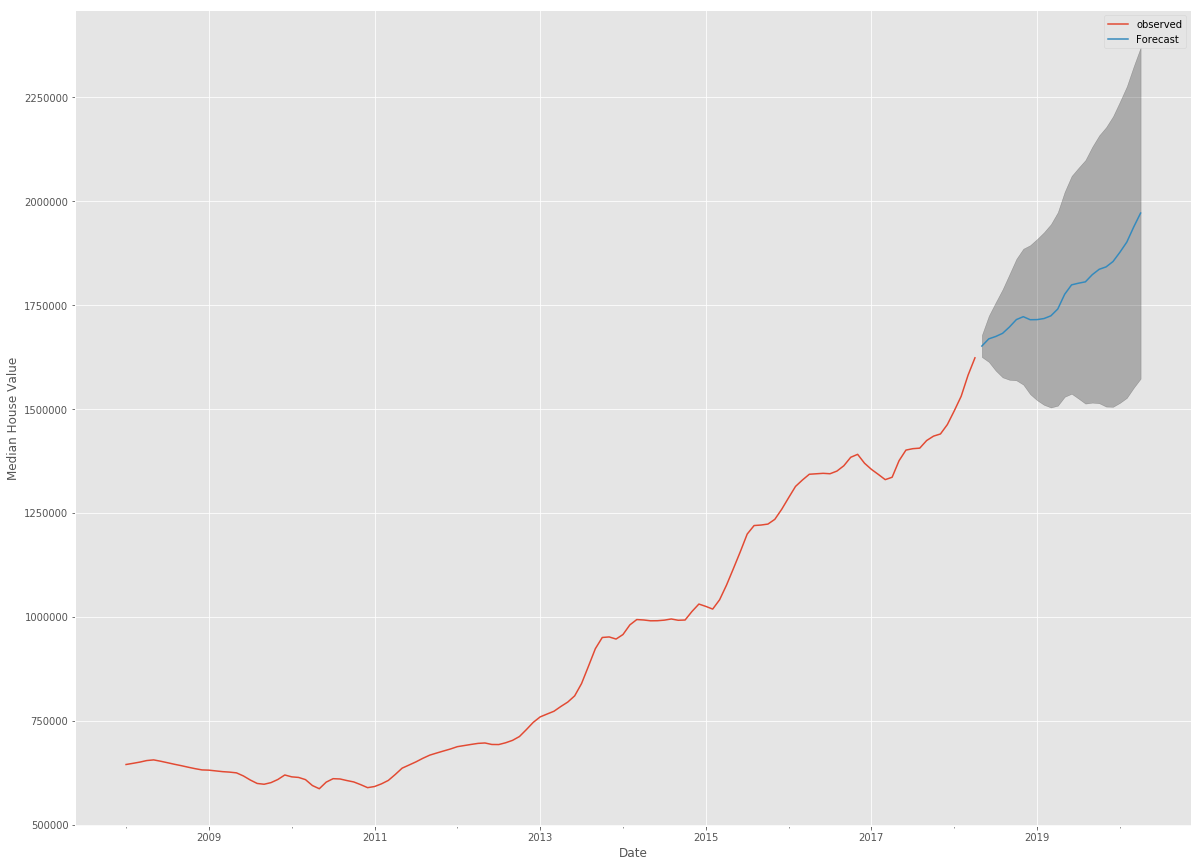

In [44]:
willyb = sampling(ny_ten_years, 11211)
p = pdqz(willyb)
output = arimamodel(willyb, p)
mse = MSEr(willyb, output, '2010-01-01' )
futures = future_value(willyb, output, 24)
plotting_forecasts(willyb, output, 24, '2010-01-01', 'Date', 'Median House Value')


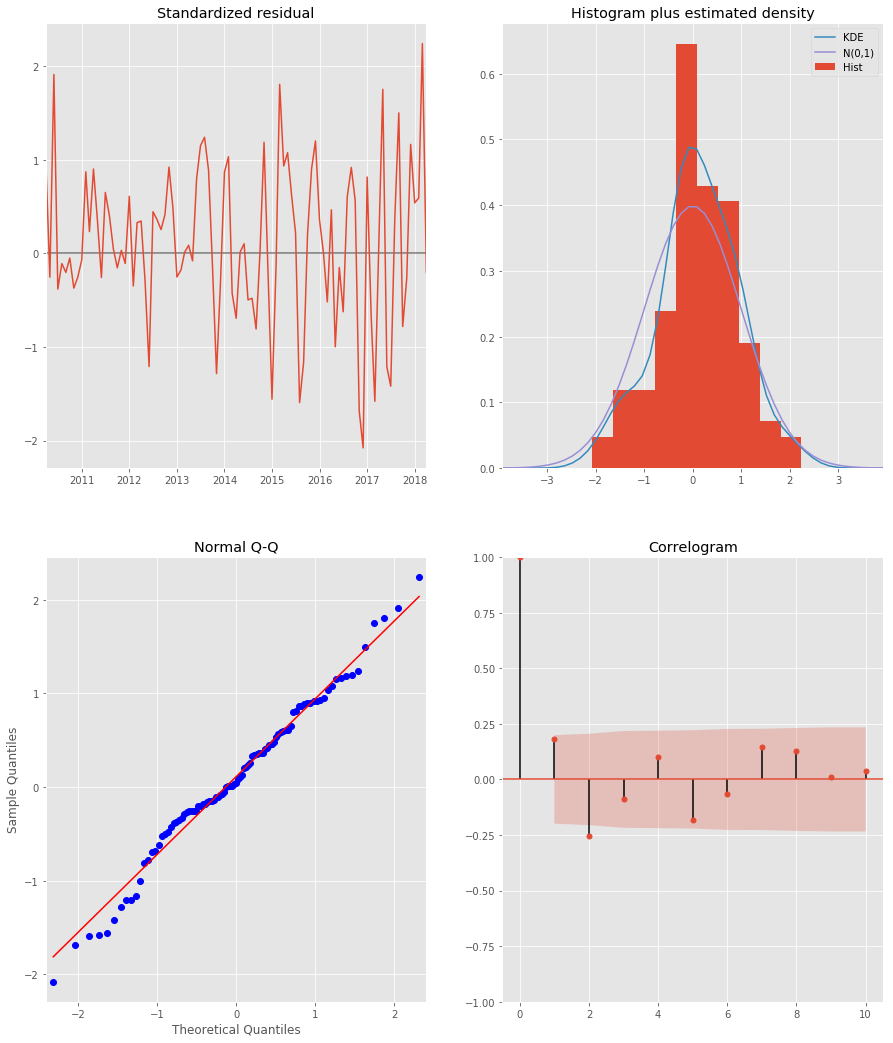

In [92]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Step 5: ARIMA Modeling

In [47]:
zip_reals = ny_ten_years.RegionName.unique()

In [41]:
#practice Zip codes

zips = [10467, 11226, 11375]

In [ ]:
## Skeleton For Loop
results = pd.DataFrame({'zipcode': [], 'mse': [], 'mean_value': [], '5YA': [], '10YA': [],'lower': [], 'upper':[] })
for i in zip_reals:
    # Create dataframe for that zipcode
    df = sampling(ny_ten_years, i)
    # Get ARIMA parameters
    p = pdqz(df)
    # Run ARIMA Model
    output = arimamodel(df, p)
    # Get MSE   
    mse = MSEr(df, output, '2010-01-01')
    # 5 & 10 Yr Values
    five = df['2015-01-01']
    ten = df['2010-01-01']
    # Get 12 steps ahead value and confidence interval
    futures = future_value(df, output, 24)
    mean = futures[0]
    lower = futures[1]
    upper = futures[2]
    # Store values in new dataframe
    results = results.append({'zipcode': i, 'mse': mse, 'mean_value': mean, '5YA': five, '10YA': ten,'lower': lower, 'upper':upper }, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [43]:
results.head()

,zipcode,mse,mean_value,5YA,10YA,lower,upper
0,10467.0,3.396125e+08,4.756547e+05,339300.0,328100.0,3.850486e+05,5.662607e+05
1,11226.0,1.131377e+09,1.226928e+06,690900.0,531900.0,9.822133e+05,1.471643e+06
2,11375.0,1.564197e+07,1.245378e+06,837500.0,679200.0,1.083126e+06,1.407630e+06


In [ ]:
#Create Table Calculations
results['growth_10'] = results['mean_value'] - results['10YA']
results['conservative10'] = results['lower'] - results['10YA']
results['growth_5'] = results['mean_value'] - results['5YA']
results['conservative5'] = results['lower'] - results['5YA']

In [ ]:
# Conservative 10-year Growth 
results.nlargest(15, 'conservative10')
#look for any bad MSE values 

In [ ]:
# Conservative 10-year Growth 
results.nlargest(15, 'conservative5')
#look for any bad MSE values 

# Step 6: Interpreting Results